# 라이브러리 설치

In [9]:
!pip install finance-datareader


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import FinanceDataReader as fdr
import pandas as pd

df_krx = pd.read_csv("https://raw.githubusercontent.com/corazzon/finance-data-analysis/main/krx.csv")
df_krx.head()


,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


- 미국 S&P500에 상장된 종목 조회

In [11]:
df_spx = fdr.StockListing('S&P500')
print(len(df_spx))
df_spx.head()


503


,Symbol,Name,Sector,Industry
0,MMM,3M,Industrials,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment
3,ABBV,AbbVie,Health Care,Biotechnology
4,ACN,Accenture,Information Technology,IT Consulting & Other Services


# 가격 데이터 수집
- GS글로벌 데이터 수집 (001250)

In [12]:
df = fdr.DataReader('001250', '2024-01-01', '2024-12-31')
df.head()



,Open,High,Low,Close,Volume,Change
Date,,,,,,
2024-01-02,2545,2560,2525,2550,293544,0.000000
2024-01-03,2525,2725,2520,2595,2318575,0.017647
2024-01-04,2625,2680,2585,2585,2023673,-0.003854
2024-01-05,2590,2590,2540,2570,472028,-0.005803
2024-01-08,2570,2575,2540,2555,295378,-0.005837


# Pandas 주요 문법
- 시계열과 관련된 주요 메서드 소개
- shift() : 시차 데이터 생성
- diff() : 차분 데이터 생성
- pct_change() : 변화량 데이터 생성
- rolling() : 이동평균 데이터 생성
- resample() : 시간 간격 데이터 생성
- cumsum() : 누적합 데이터 생성
- cumprod() : 누적곱 데이터 생성
- cummax() : 누적최대값 데이터 생성
- cummin() : 누적최소값 데이터 생성
- cumprod() : 누적곱 데이터 생성
- rescale() : 데이터 정규화

In [13]:
# shift() 예제 - 전일 데이터와 비교
df['전일종가'] = df['Close'].shift(1)
print("# shift() 결과:")
print(df[['Close', '전일종가']].head())

# shift() 결과:
            Close    전일종가
Date                     
2024-01-02   2550     NaN
2024-01-03   2595  2550.0
2024-01-04   2585  2595.0
2024-01-05   2570  2585.0
2024-01-08   2555  2570.0


In [14]:
# diff() 예제 - 전일 대비 가격 변동
df['가격변동'] = df['Close'].diff()
print("# diff() 결과:")
print(df[['Close', '가격변동']].head())

# diff() 결과:
            Close  가격변동
Date                   
2024-01-02   2550   NaN
2024-01-03   2595  45.0
2024-01-04   2585 -10.0
2024-01-05   2570 -15.0
2024-01-08   2555 -15.0


In [15]:
# pct_change() 예제 - 수익률 계산
df['일간수익률'] = df['Close'].pct_change()
print("# pct_change() 결과:")
print(df[['Close', '일간수익률']].head())

# pct_change() 결과:
            Close     일간수익률
Date                       
2024-01-02   2550       NaN
2024-01-03   2595  0.017647
2024-01-04   2585 -0.003854
2024-01-05   2570 -0.005803
2024-01-08   2555 -0.005837


In [16]:
# rolling() 예제 - 5일 이동평균
df['MA5'] = df['Close'].rolling(window=5).mean()
print("# rolling() 결과:")
print(df[['Close', 'MA5']].head())

# rolling() 결과:
            Close     MA5
Date                     
2024-01-02   2550     NaN
2024-01-03   2595     NaN
2024-01-04   2585     NaN
2024-01-05   2570     NaN
2024-01-08   2555  2571.0


In [17]:
# resample() 예제 - 주간 종가 데이터
weekly_data = df['Close'].resample('W').last()
print("# resample() 결과 (주간):")
print(weekly_data.head())

# resample() 결과 (주간):
Date
2024-01-07    2570
2024-01-14    2680
2024-01-21    2690
2024-01-28    2570
2024-02-04    2670
Freq: W-SUN, Name: Close, dtype: int64


In [18]:
# cumsum() 예제 - 거래량 누적합
df['거래량누적'] = df['Volume'].cumsum()
print("# cumsum() 결과:")
print(df[['Volume', '거래량누적']].head())

# cumsum() 결과:
             Volume    거래량누적
Date                        
2024-01-02   293544   293544
2024-01-03  2318575  2612119
2024-01-04  2023673  4635792
2024-01-05   472028  5107820
2024-01-08   295378  5403198


In [19]:
# cumprod() 예제 - 수익률 누적곱
df['누적수익률'] = (1 + df['일간수익률']).cumprod()
print("# cumprod() 결과:")
print(df[['일간수익률', '누적수익률']].head())

# cumprod() 결과:
               일간수익률     누적수익률
Date                          
2024-01-02       NaN       NaN
2024-01-03  0.017647  1.017647
2024-01-04 -0.003854  1.013725
2024-01-05 -0.005803  1.007843
2024-01-08 -0.005837  1.001961


In [20]:
# cummax() 예제 - 최고가 갱신 추적
df['최고가갱신'] = df['High'].cummax()
print("# cummax() 결과:")
print(df[['High', '최고가갱신']].head())

# cummax() 결과:
            High  최고가갱신
Date                   
2024-01-02  2560   2560
2024-01-03  2725   2725
2024-01-04  2680   2725
2024-01-05  2590   2725
2024-01-08  2575   2725


In [21]:
# cummin() 예제 - 최저가 추적
df['최저가갱신'] = df['Low'].cummin()
print("# cummin() 결과:")
print(df[['Low', '최저가갱신']].head())

# cummin() 결과:
             Low  최저가갱신
Date                   
2024-01-02  2525   2525
2024-01-03  2520   2520
2024-01-04  2585   2520
2024-01-05  2540   2520
2024-01-08  2540   2520


In [22]:
# 데이터 정규화 예제 (0~1 스케일링)
df['종가정규화'] = (df['Close'] - df['Close'].min()) / (df['Close'].max() - df['Close'].min())
print("# 정규화 결과:")
print(df[['Close', '종가정규화']].head())

# 정규화 결과:
            Close     종가정규화
Date                       
2024-01-02   2550  0.111111
2024-01-03   2595  0.133838
2024-01-04   2585  0.128788
2024-01-05   2570  0.121212
2024-01-08   2555  0.113636


# TA-Lib 라이브러리 설치 및 활용
- 아래코드 실행 전, 사전에 프로그램 설치는 홈페이지 참조 (https://ta-lib.org/install/)
- https://github.com/cgohlke/talib-build/?tab=readme-ov-file

In [32]:
!python -m pip install ta_lib-0.6.0-cp312-cp312-win_amd64.whl

Processing c:\users\campus3s043\desktop\alpaco_lectures\step08_finance\ta_lib-0.6.0-cp312-cp312-win_amd64.whl



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
import pandas as pd
import talib

print(pd.__version__)
print(talib.__version__)


2.2.3
0.6.0


## 라이브러리 불러오기

# 애플 주식 데이터

In [58]:
import yfinance as yf
from datetime import datetime

# Set date range
start_date = '2024-01-01'
end_date = '2024-12-31'

# Get Apple stock data using yfinance directly
aapl_data = yf.download('AAPL', start=start_date, end=end_date, progress=False, auto_adjust=True)
print(aapl_data.head()) 


                  Open        High         Low       Close    Volume
Date                                                                
2024-01-02  186.237618  187.521338  182.993517  184.734985  82488700
2024-01-03  183.321908  184.973819  182.535751  183.351761  58414500
2024-01-04  181.261983  182.197403  179.998185  181.023163  71983600
2024-01-05  181.102771  181.869006  179.291637  180.296707  62303300
2024-01-08  181.202281  184.695178  180.615161  184.655365  59144500


In [61]:
# 단순이동평균, SMA 계산
aapl_data['SMA_20'] = talib.SMA(aapl_data['Close'], timeperiod=20)
 
# 상대강도지수(RSI)
aapl_data['RSI'] = talib.RSI(aapl_data['Close'], timeperiod=14) 

aapl_data.tail()


,Open,High,Low,Close,Volume,SMA_20,RSI
Date,,,,,,,
2024-12-23,254.770004,255.649994,253.449997,255.270004,40858800,245.026999,73.085629
2024-12-24,255.490005,258.209991,255.289993,258.200012,23234700,246.293500,75.750264
2024-12-26,258.190002,260.100006,257.630005,259.019989,27237100,247.491499,76.452865
2024-12-27,257.829987,258.700012,253.059998,255.589996,42355300,248.524500,67.626261
2024-12-30,252.229996,253.500000,250.750000,252.199997,35557500,249.267999,60.225576


# 퀀트 투자 분석

[*********************100%***********************]  1 of 1 completed


Downloaded AAPL data


[*********************100%***********************]  1 of 1 completed


Downloaded MSFT data


[*********************100%***********************]  1 of 1 completed


Downloaded GOOGL data


[*********************100%***********************]  1 of 1 completed


Downloaded AMZN data


[*********************100%***********************]  1 of 1 completed


Downloaded NVDA data

AAPL 모멘텀 팩터:
            momentum_20d  momentum_60d  momentum_120d
Date                                                 
2024-03-08     -0.093405     -0.116213      -0.024456
2024-03-11     -0.085253     -0.112783      -0.029331
2024-03-12     -0.074379     -0.124924      -0.032613
2024-03-13     -0.075173     -0.136187      -0.024845
2024-03-14     -0.060548     -0.124361      -0.005347

AAPL 변동성 팩터:
            volatility_20d  volatility_60d
Date                                      
2024-03-08        0.010035        0.011551
2024-03-11        0.010585        0.011619
2024-03-12        0.010643        0.011377
2024-03-13        0.010676        0.011443
2024-03-14        0.011169        0.011571

AAPL 거래량 팩터:
            volume_ma20  volume_ratio
Date                                 
2024-03-08   62663045.0      1.214665
2024-03-11   63412260.0      0.948389
2024-03-12   64314435.0      0.930202
2024-03-13   64112395.0      0.818698
2024-03-14   65026545.0      1

<Figure size 1500x1000 with 0 Axes>

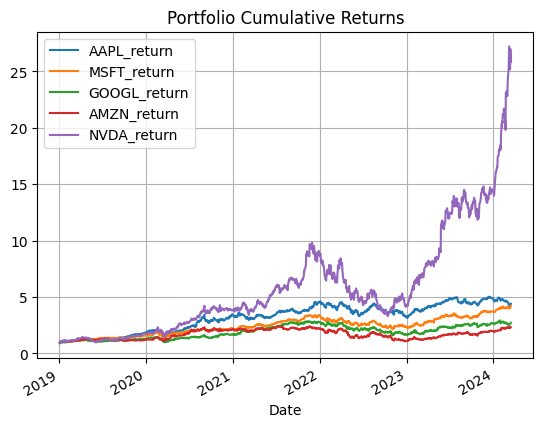

In [1]:
# 퀀트 투자 분석
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime

# 분석 기간 설정
START_DATE = '2019-01-01'
END_DATE = '2024-03-15'

# 1. 분석 대상 종목 정의
TECH_STOCKS = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA']
KOREA_STOCKS = ['005930.KS', '000660.KS', '035420.KS']  # 삼성전자, SK하이닉스, NAVER

# 2. 데이터 수집
def get_stock_data():
    tech_data = {}
    for symbol in TECH_STOCKS:
        df = yf.download(symbol, start=START_DATE, end=END_DATE)
        tech_data[symbol] = df
        print(f"Downloaded {symbol} data")
    return tech_data

stock_data = get_stock_data()

# 3. 팩터 계산 함수들
def calculate_momentum(df, periods=[20, 60, 120]):
    """모멘텀 팩터 계산"""
    results = pd.DataFrame(index=df.index)
    for period in periods:
        results[f'momentum_{period}d'] = df['Close'].pct_change(period)
    return results

def calculate_volatility(df, periods=[20, 60]):
    """변동성 팩터 계산"""
    results = pd.DataFrame(index=df.index)
    for period in periods:
        results[f'volatility_{period}d'] = df['Close'].pct_change().rolling(period).std()
    return results

def calculate_volume_factors(df):
    """거래량 관련 팩터 계산"""
    results = pd.DataFrame(index=df.index)
    results['volume_ma20'] = df['Volume'].rolling(20).mean()
    results['volume_ratio'] = df['Volume'] / results['volume_ma20']
    return results

# 4. 기술적 지표 계산
def calculate_technical_indicators(df):
    """기술적 지표 계산"""
    results = pd.DataFrame(index=df.index)
    
    # 이동평균선
    for period in [5, 20, 60]:
        results[f'MA_{period}'] = df['Close'].rolling(period).mean()
    
    # RSI
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    results['RSI'] = 100 - (100 / (1 + rs))
    
    return results

# 5. 포트폴리오 분석
def analyze_portfolio(stock_data):
    """포트폴리오 분석"""
    portfolio = pd.DataFrame()
    
    # 일간 수익률 계산
    for symbol in stock_data.keys():
        portfolio[f'{symbol}_return'] = stock_data[symbol]['Close'].pct_change()
    
    # 포트폴리오 통계
    stats = {
        'Daily_Return': portfolio.mean(),
        'Volatility': portfolio.std(),
        'Sharpe_Ratio': portfolio.mean() / portfolio.std() * np.sqrt(252),
        'Max_Drawdown': (portfolio.cumsum() - portfolio.cumsum().expanding().max()).min()
    }
    
    return portfolio, pd.DataFrame(stats)

# 6. 실행 및 결과 출력
# AAPL 예시 분석
aapl_data = stock_data['AAPL']

# 팩터 계산
momentum = calculate_momentum(aapl_data)
volatility = calculate_volatility(aapl_data)
volume = calculate_volume_factors(aapl_data)
technical = calculate_technical_indicators(aapl_data)

print("\nAAPL 모멘텀 팩터:")
print(momentum.tail())

print("\nAAPL 변동성 팩터:")
print(volatility.tail())

print("\nAAPL 거래량 팩터:")
print(volume.tail())

print("\nAAPL 기술적 지표:")
print(technical.tail())

# 포트폴리오 분석
portfolio, stats = analyze_portfolio(stock_data)
print("\n포트폴리오 통계:")
print(stats)

# 7. 시각화
import matplotlib.pyplot as plt

def plot_portfolio_performance():
    plt.figure(figsize=(15, 10))
    
    # 수익률 누적 곡선
    cumulative_returns = (1 + portfolio).cumprod()
    cumulative_returns.plot(title='Portfolio Cumulative Returns')
    plt.grid(True)
    plt.show()

plot_portfolio_performance()